In [80]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pylab as plt
import seaborn as sns
import warnings
from sklearn.model_selection import KFold, cross_val_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix , precision_score,  recall_score, auc,roc_curve,accuracy_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [13]:
df=pd.read_csv("zoo.csv")

In [14]:
df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,spider,0,0,1,0,0,0,1,1,0,1,1,0,8,0,0,0,7
210,snail,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
211,silkworm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
212,jellyfish,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,7


In [18]:
df=shuffle(df)
df=df.reset_index(drop=True)
df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,mackerel,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,4
1,flea,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6
2,mosquito,0,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
3,gorilla,1,0,0,1,0,0,0,1,1,1,0,0,2,0,0,1,1
4,vole,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,aphid,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6
210,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
211,chameleon,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3
212,salamander,0,0,1,0,0,1,0,1,1,1,0,0,4,1,1,0,5


In [21]:
df.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [22]:
df.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')

In [24]:
df.drop("animal_name", axis=1,inplace=True)

In [25]:
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,4
1,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6
2,0,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
3,1,0,0,1,0,0,0,1,1,1,0,0,2,0,0,1,1
4,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6
210,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
211,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3
212,0,0,1,0,0,1,0,1,1,1,0,0,4,1,1,0,5


In [27]:
Y=df["class_type"]
X=df.drop("class_type",axis=1)

In [104]:
#function for evaluation of model
def Evaluate_Performance(Model, Xtrain, Xtest, Ytrain, Ytest) :
    Model.fit(Xtrain,Ytrain)
    overall_score = cross_val_score(Model, Xtrain,Ytrain, cv=10)
    model_score = np.average(overall_score)
    Ypredicted = Model.predict(Xtest)
    avg = 'weighted'
    print("\n • Training Accuracy Score : ",round(Model.score(Xtrain, Ytrain) * 100,2))                               
    print(f" • Cross Validation Score : {round(model_score * 100,2)}")                               
    print(f" • Testing Accuracy Score :{round(accuracy_score(Ytest, Ypredicted) * 100,2)}")                               
    print(f" • Precision Score is : {np.round(precision_score(Ytest, Ypredicted , average=avg) * 100,2)}")
    print(f" • Recall Score is : {np.round(recall_score(Ytest, Ypredicted , average=avg) * 100,2)}")
    print(f" • F1-Score Score is : {np.round(f1_score(Ytest, Ypredicted , average=avg) * 100,2)}")

In [91]:
#function for creating the confusion matrix for the algorithms
def confusion_matrix_cm(model_predict):
    y = df["class_type"]
    cm = confusion_matrix (y , model_predict)
    fig, ax = plt.subplots (figsize = (8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.set_xlabel('Predicted outputs', fontsize= 14 , color='black')
    ax.set_ylabel('Actual outputs', fontsize= 14 , color='black')
    ax.xaxis.set(ticks=range(7))
    ax.yaxis.set(ticks=range(7))
    ax.set_ylim(6.5 , -0.5)
    for i in range(7):
        for j in range(7):
            ax.text(j, i, cm[i, j], ha = 'center' , va = 'center' , color = 'red')
    plt.show()

In [28]:
X_train,X_test,y_train, y_test = train_test_split(X,Y, train_size=0.7)

In [117]:
y_test.value_counts()

1    18
2    16
6     8
3     8
4     6
5     5
7     4
Name: class_type, dtype: int64

# 1. LOGISTIC REGRESSION-

In [105]:
from sklearn.linear_model import LogisticRegression
log_model =LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log=log_model.predict(X_test)
print("For logistic Regression:-")
Evaluate_Performance(log_model,X_train,X_test,y_train,y_test)

For logistic Regression:-

 • Training Accuracy Score :  95.97
 • Cross Validation Score : 93.29
 • Testing Accuracy Score :95.38
 • Precision Score is : 95.6
 • Recall Score is : 95.38
 • F1-Score Score is : 95.39


<Axes: >

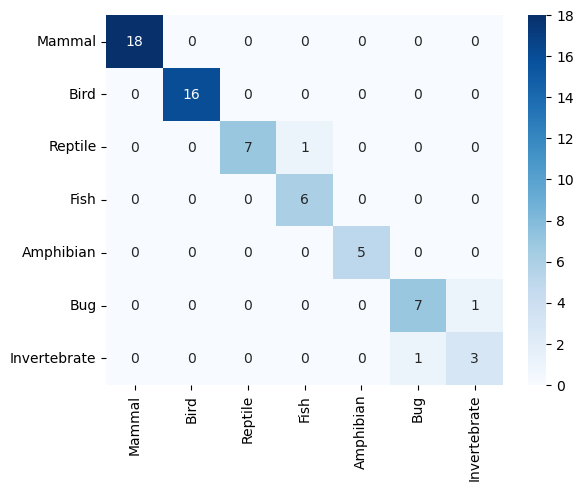

In [119]:
classes=["Mammal","Bird","Reptile","Fish","Amphibian","Bug","Invertebrate"]
cm = confusion_matrix(y_test,log_model.predict(X_test))
sns.heatmap(cm,annot=True,cmap="Blues",xticklabels=classes,yticklabels=classes)

# 2. NAIVE BAYES-

In [54]:
NB = GaussianNB()
NB.fit(X_train , y_train)
y_pred_NB = NB.predict(X_test)
print("Naive Bayes :-")
Evaluate_Performance(NB, X_train, X_test, y_train, y_test)

Naive Bayes :-

 • Training Accuracy Score :  94.63
 • Cross Validation Score : 92.67
 • Testing Accuracy Score :96.92
 • Precision Score is : 97.31
 • Recall Score is : 96.92
 • F1-Score Score is : 96.87


<Axes: >

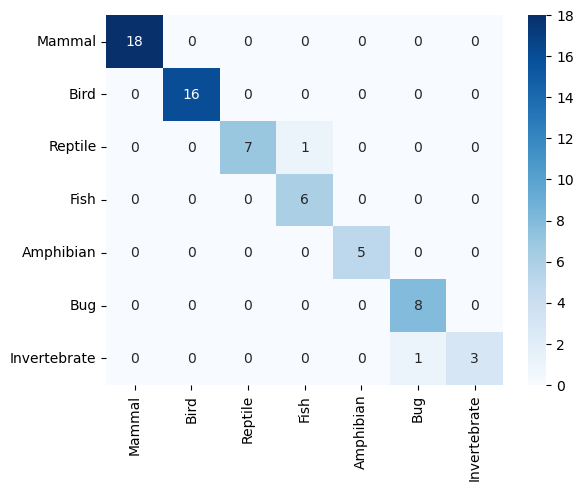

In [120]:
cm = confusion_matrix(y_test,NB.predict(X_test))
sns.heatmap(cm,annot=True,cmap="Blues",xticklabels=classes,yticklabels=classes)

# 3. SUPPRT VECTOR MACHINE-

In [61]:
svm_model=SVC(C=1.0)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("Supprt Vector Machine :-")
Evaluate_Performance(svm_model, X_train, X_test, y_train, y_test)

Supprt Vector Machine :-

 • Training Accuracy Score :  96.64
 • Cross Validation Score : 95.33
 • Testing Accuracy Score :95.38
 • Precision Score is : 96.03
 • Recall Score is : 95.38
 • F1-Score Score is : 95.23


<Axes: >

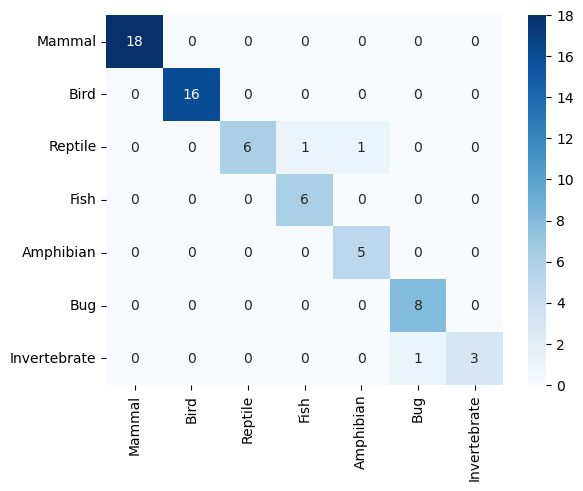

In [121]:
cm = confusion_matrix(y_test,svm_model.predict(X_test))
sns.heatmap(cm,annot=True,cmap="Blues",xticklabels=classes,yticklabels=classes)

## 4. K NEAREST NEIGHBORS-

In [77]:
model_knn = KNeighborsClassifier(n_neighbors = 7)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)
print("K Nearest Neighbor :-")
Evaluate_Performance(model_knn, X_train, X_test, y_train, y_test)

K Nearest Neighbor :-

 • Training Accuracy Score :  93.29
 • Cross Validation Score : 89.95
 • Testing Accuracy Score :90.77
 • Precision Score is : 93.05
 • Recall Score is : 90.77
 • F1-Score Score is : 89.8


<Axes: >

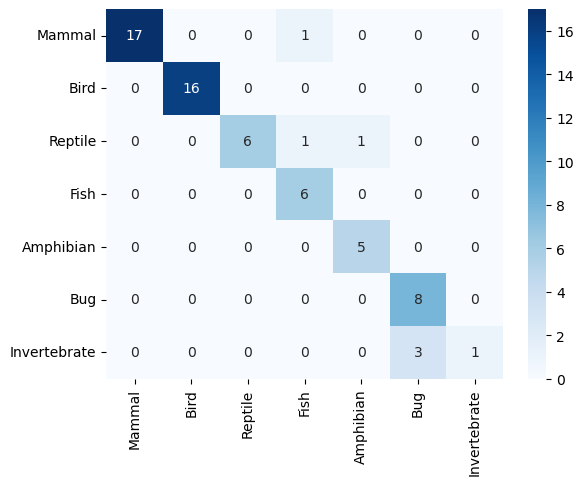

In [122]:
cm = confusion_matrix(y_test,model_knn.predict(X_test))
sns.heatmap(cm,annot=True,cmap="Blues",xticklabels=classes,yticklabels=classes)

## 5. DESICION TREE CLASSIFICATION-

In [83]:
clf=DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_clf=clf.predict(X_test)
print("Decision Tree Clasiffier :-")
Evaluate_Performance(clf, X_train, X_test, y_train, y_test)

Decision Tree Clasiffier :-

 • Training Accuracy Score :  98.66
 • Cross Validation Score : 93.33
 • Testing Accuracy Score :96.92
 • Precision Score is : 97.4
 • Recall Score is : 96.92
 • F1-Score Score is : 96.92


<Axes: >

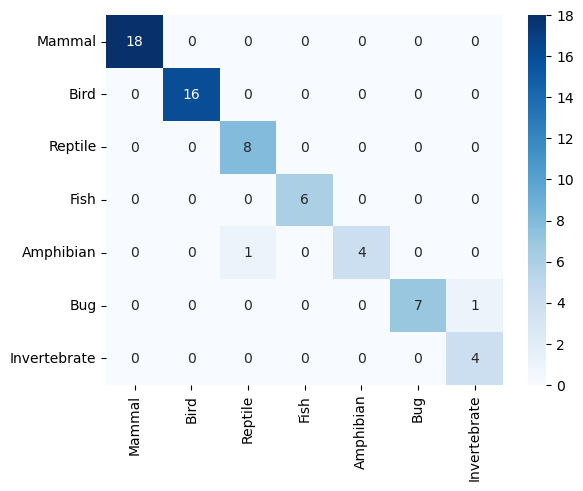

In [124]:
cm = confusion_matrix(y_test,clf.predict(X_test))
sns.heatmap(cm,annot=True,cmap="Blues",xticklabels=classes,yticklabels=classes)

# COMPARITIVE ANALYSIS

In [112]:
data={
    "Classification Algorithm":["Logistic Regression","Naive Bayes","SVM","KNN","Decision Tree"],
    "Training Accuracy":[95.97,94.63,96.64,93.29,98.66],
    "Cross Validation Score":[93.29,92.67,95.33,89.95,93.33],
    "Testing Accuracy Score":[95.38,96.92,95.38,90.77,96.92],
    "Precision score":[95.6,97.31,96.03,93.05,97.4],
    "Recall score":[95.38,96.92,95.38,90.77,96.92],
    "F1-Score":[95.39,96.87,95.23,89.8,96.92]  
}
df1=pd.DataFrame(data)
df1

,Classification Algorithm,Training Accuracy,Cross Validation Score,Testing Accuracy Score,Precision score,Recall score,F1-Score
0,Logistic Regression,95.97,93.29,95.38,95.60,95.38,95.39
1,Naive Bayes,94.63,92.67,96.92,97.31,96.92,96.87
2,SVM,96.64,95.33,95.38,96.03,95.38,95.23
3,KNN,93.29,89.95,90.77,93.05,90.77,89.80
4,Decision Tree,98.66,93.33,96.92,97.40,96.92,96.92
